## Notebook for creating validation datasets

In [1]:
import sys
from pathlib import Path

sys.path.append(str(Path("..").resolve()))

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def plot_labels(labels, bins=50):
    # Show distribution of labels
    fig, (ax1, ax2, ax3) = plt.subplots(3,1)

    ax1.hist(labels[...,0], color='b',label='First principal component', bins=bins)
    ax2.hist(labels[...,1], color='r', label='Second principal component', bins=bins)
    ax3.hist(np.rad2deg(labels[:,2]), color='k', label='Angle')

    ax1.set_xlabel('Diffusion coeff')
    ax2.set_xlabel('Diffusion coeff')
    ax3.set_xlabel('Angle (deg)')

    fig.supylabel('Count')
    fig.suptitle('Distribution of validation set labels')
    fig.legend(fontsize=7)
    fig.tight_layout()
    plt.show()

## Test set

### Single State

In [3]:
import numpy as np
from simulation import *
from settings import T, SINGLE_STATE_PROPS

# Set random seed for consistency in generation
#np.random.seed(1)

# Image parameters
N = 5000 # number of particles to simulate

videos, displacement, labels = create_training_set_w_features(N, T, SINGLE_STATE_PROPS, dt=0.001)

In [4]:
print(videos.shape)
print(displacement.shape)
print(labels.shape)

(5000, 30, 11, 11)
(5000, 29, 2)
(5000, 3)


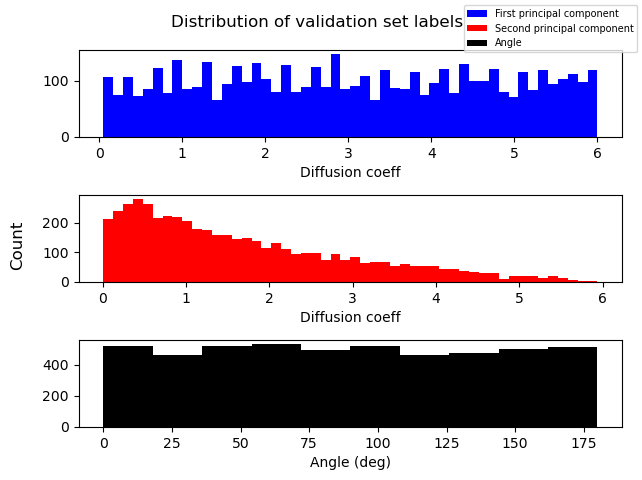

In [5]:
plot_labels(labels)

In [6]:
# Write data to file
np.savez('../data/validation_data_11.npz', vids=videos, disp=displacement, labels=labels)

In [7]:
from simulation import play_video

i = np.random.randint(0,N)

play_video(videos[i], labels[i])

vmin: -0.13408969342708588 vmax: 1.0417193174362183 mean: 0.09


### Multi-state

In [ ]:
import numpy as np
from simulation import *
from settings import T, BINDING_IMAGE_PROPS, ISOTROPIC_PROPS

# Image parameters
N = 5000 # number of particles to simulate

# Change arguments depending on isotropic or binding case of two-state diffusion
videos, displacement, labels = create_multi_state_dataset_w_features(N, T, ISOTROPIC_PROPS, binding=False)

In [9]:
print(videos.shape, displacement.shape, labels.shape)

(5000, 30, 11, 11) (5000, 29, 2) (5000, 30, 3)


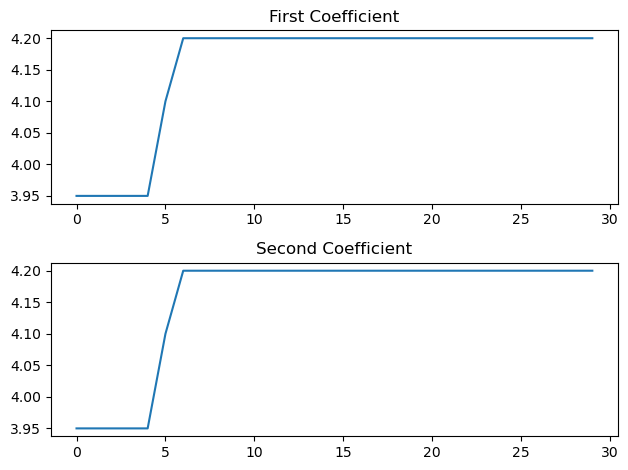

In [10]:
import matplotlib.pyplot as plt

fig, (ax,ax2) = plt.subplots(2,1)
i = np.random.randint(0, labels.shape[0])
ax.plot(labels[i, :, 0])
ax.set_title('First Coefficient')
ax2.plot(labels[i,:, 1])
ax2.set_title('Second Coefficient')
plt.tight_layout()

plt.show()

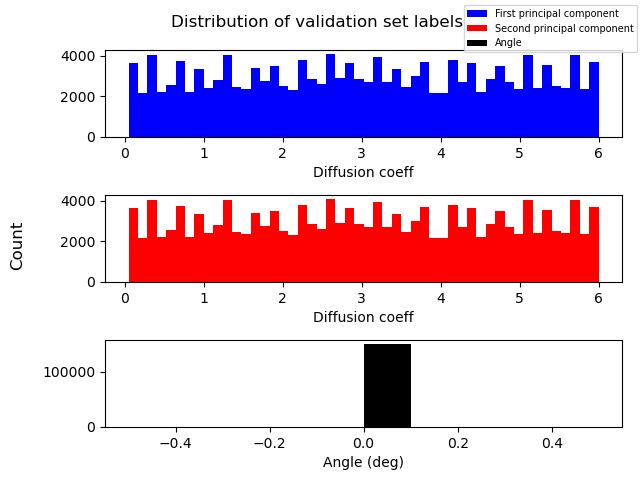

In [11]:
plot_labels(labels.reshape(-1, 3))

In [12]:
from simulation import play_video

i = np.random.randint(0,N)

play_video(videos[i], labels[i])

vmin: -0.15927892923355103 vmax: 0.651179313659668 mean: 0.09


In [43]:
# Write data to file
np.savez('../data/multi_state_iso_11.npz', vids=videos, disp=displacement, labels=labels)